<a href="https://colab.research.google.com/github/woonkirov/section-1-project/blob/main/AI_07_%EC%9D%B4%EA%B8%B0%ED%95%9C_Section_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#지역별 장르 선호도
#연도별 게임 트렌드
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스

import pandas as pd
pd.set_option('mode.chained_assignment',  None)

df = pd.read_csv('vgames2.csv', index_col = 0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [3]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
df.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [5]:
df1 = df.drop(['Name', 'Platform', 'Year', 'Publisher'], axis = 1)
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0,0,0
2,Action,0.17,0,0,0.01
3,Adventure,0,0,0.02,0
4,Misc,0.04,0,0,0
5,Platform,0.12,0.09,0,0.04
...,...,...,...,...,...
16594,Platform,0.15,0.04,0,0.01
16595,Action,0.01,0,0,0
16596,Sports,0.44,0.19,0.03,0.13
16597,Action,0.05,0.05,0.25,0.03


In [6]:
def mynum(x):
  if 'M' in x:
    x = x.replace('M', '')
    return float(x)
  elif 'K' in x:
    x = x.replace('K', '000')
    return float(x) / 1000000
  else:
    return float(x)

In [7]:
df1['NA_Sales'] = df1['NA_Sales'].apply(mynum)
df1['EU_Sales'] = df1['EU_Sales'].apply(mynum)
df1['JP_Sales'] = df1['JP_Sales'].apply(mynum)
df1['Other_Sales'] = df1['Other_Sales'].apply(mynum)
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16594,Platform,0.15,0.04,0.00,0.01
16595,Action,0.01,0.00,0.00,0.00
16596,Sports,0.44,0.19,0.03,0.13
16597,Action,0.05,0.05,0.25,0.03


In [8]:
df1grp = df1.groupby('Genre').sum()
df1grp['Total_Sales'] = df1grp['NA_Sales'] + df1grp['EU_Sales'] + df1grp['JP_Sales'] + df1grp['Other_Sales']
df1grp

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,874.81,522.16,157.90,186.45,1741.32
Adventure,105.66,64.05,51.95,16.81,238.47
Fighting,223.20,101.22,87.34,36.64,448.40
Misc,408.05,212.36,105.27,74.04,799.72
Platform,446.44,201.61,130.65,51.53,830.23
Puzzle,123.35,50.73,56.87,12.52,243.47
Racing,357.19,237.10,56.40,77.10,727.79
Role-Playing,319.54,183.58,344.95,56.96,905.03
Shooter,581.92,313.05,38.28,102.65,1035.90


In [9]:
df1_NA = df1grp['NA_Sales'].sort_values(ascending = False)
df1_JP = df1grp['JP_Sales'].sort_values(ascending = False)
df1_EU = df1grp['EU_Sales'].sort_values(ascending = False)
df1_etc = df1grp['Other_Sales'].sort_values(ascending = False)
df1_total = df1grp['Total_Sales'].sort_values(ascending = False)
df1_NA

Genre
Action          874.81
Sports          680.52
Shooter         581.92
Platform        446.44
Misc            408.05
Racing          357.19
Role-Playing    319.54
Fighting        223.20
Simulation      182.96
Puzzle          123.35
Adventure       105.66
Strategy         68.70
Name: NA_Sales, dtype: float64

In [10]:
import matplotlib.pyplot as plt

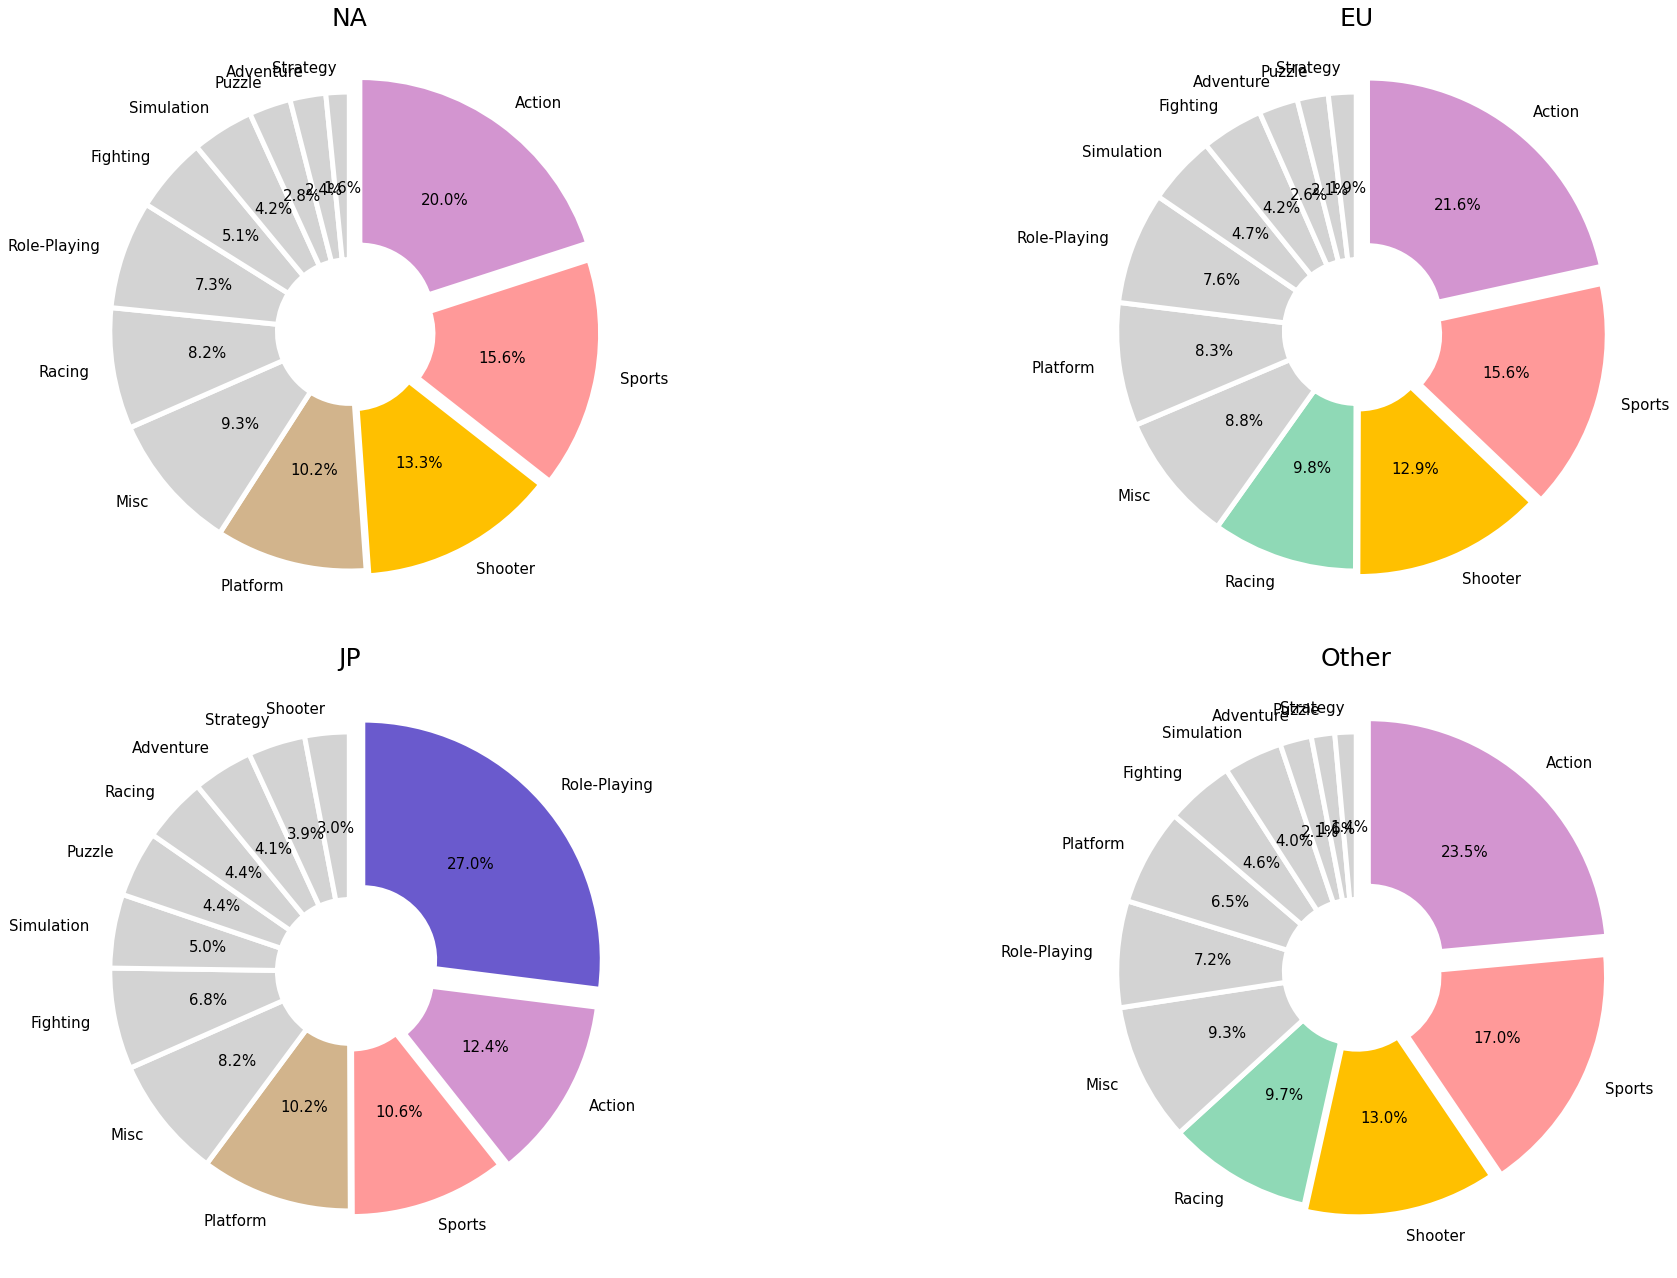

In [11]:
plt.figure(figsize = (32, 18))
plt.rc('font', size = 15)

explode = [0.075, 0.05, 0.025, 0, 0, 0, 0, 0, 0, 0, 0, 0]
colors = ['#d395d0', '#ff9999', '#ffc000', '#8fd9b6', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
colors_NA = ['#d395d0', '#ff9999', '#ffc000', '#d2b48c', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
colors_JP = ['#6a5acd', '#d395d0', '#ff9999', '#d2b48c', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.subplot(2, 2, 1)
plt.pie(df1_NA, 
        labels = df1_NA.index, 
        autopct ='%.1f%%', 
        startangle = 90, 
        counterclock = False,
        explode = explode,
        colors = colors_NA,
        wedgeprops = wedgeprops)
plt.title('NA', fontsize = 25)

plt.subplot(2, 2, 2)
plt.pie(df1_EU, 
        labels = df1_EU.index, 
        autopct ='%.1f%%', 
        startangle = 90, 
        counterclock = False,
        explode = explode,
        colors = colors,
        wedgeprops = wedgeprops)
plt.title('EU', fontsize = 25)

plt.subplot(2, 2, 3)
plt.pie(df1_JP, 
        labels = df1_JP.index,  
        autopct ='%.1f%%', 
        startangle = 90, 
        counterclock = False,
        explode = explode,
        colors = colors_JP,
        wedgeprops = wedgeprops)
plt.title('JP', fontsize = 25)

plt.subplot(2, 2, 4)
plt.pie(df1_etc, 
        labels = df1_etc.index, 
        autopct ='%.1f%%', 
        startangle = 90, 
        counterclock = False,
        explode = explode,
        colors = colors,
        wedgeprops = wedgeprops)
plt.title('Other', fontsize = 25)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total')

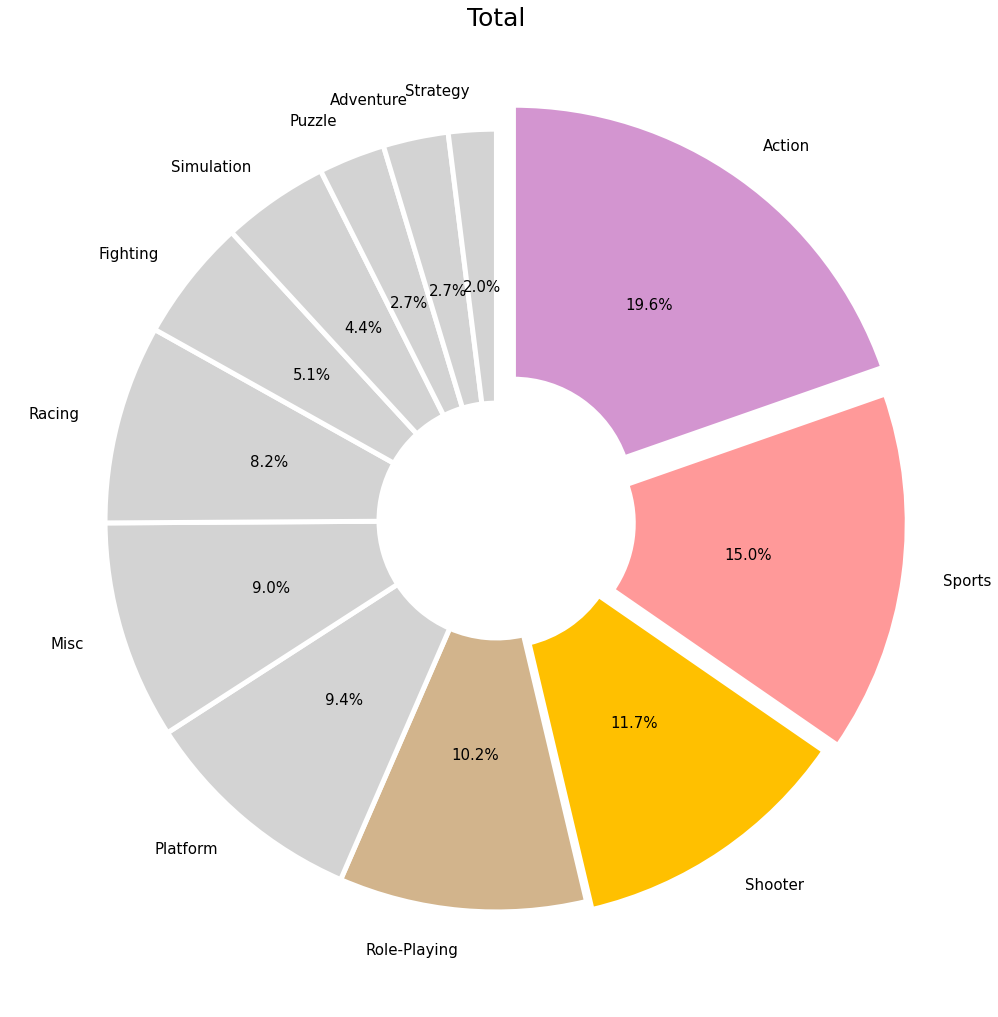

In [12]:
plt.figure(figsize = (32, 18))
plt.pie(df1_total, 
        labels = df1_total.index, 
        autopct ='%.1f%%', 
        startangle = 90, 
        counterclock = False,
        explode = explode,
        colors = colors_NA,
        wedgeprops = wedgeprops)
plt.title('Total', fontsize = 25)

장르 선호도(= 장르별 시장 점유율)

북미, 유럽, 기타 : Action > Sports > Shooter

일본 : RPG > Action > Sports

In [13]:
df2 = df1
df2['Year'] = df['Year']
df2.isnull().sum()

Genre           50
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Year           271
dtype: int64

In [14]:
df2 = df2.dropna()

In [15]:
def myyear(x):
  if 100 > x > 80:
    return int(x + 1900)
  if x < 20:
    return int(x + 2000)
  else:
    return int(x)

df2['Year'] = df2['Year'].apply(myyear)
df2.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [16]:
df2['Total_Sales'] = df2['NA_Sales'] + df2['EU_Sales'] + df2['JP_Sales'] + df2['Other_Sales']

#df2_1 = df2.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)
df2

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Total_Sales
1,Action,0.04,0.00,0.00,0.00,2008,0.04
2,Action,0.17,0.00,0.00,0.01,2009,0.18
3,Adventure,0.00,0.00,0.02,0.00,2010,0.02
4,Misc,0.04,0.00,0.00,0.00,2010,0.04
5,Platform,0.12,0.09,0.00,0.04,2010,0.25
...,...,...,...,...,...,...,...
16594,Platform,0.15,0.04,0.00,0.01,2006,0.20
16595,Action,0.01,0.00,0.00,0.00,2005,0.01
16596,Sports,0.44,0.19,0.03,0.13,2015,0.79
16597,Action,0.05,0.05,0.25,0.03,2013,0.38


In [17]:
pdf1 = pd.pivot_table(df2,               
                     index = 'Year',
                     columns = 'Genre',
                     values = 'JP_Sales', aggfunc = 'sum').fillna(0).T
pdf1.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,0.00,0.00,0.00,2.13,3.62,0.00,0.00,0.00,0.00,0.00,2.35,0.00
1984,0.83,0.00,0.00,1.45,0.69,2.23,3.09,0.00,1.96,0.00,4.02,0.00
1985,1.44,0.00,1.05,0.00,8.67,1.66,0.00,0.00,0.21,0.00,1.53,0.00
1986,5.31,0.00,0.00,0.00,8.11,0.00,0.41,0.52,2.77,0.00,2.69,0.00
1987,0.00,1.61,1.87,0.00,0.69,0.00,0.00,4.18,0.00,0.00,3.28,0.00
1988,0.42,0.00,0.00,0.00,5.70,1.81,0.19,5.78,0.00,0.00,1.86,0.00


In [18]:
pdf1['~1985'] = pdf1.iloc[:, 0] + pdf1.iloc[:, 1] + pdf1.iloc[:, 2] + pdf1.iloc[:, 3] + pdf1.iloc[:, 4]
pdf1['~1990'] = pdf1.iloc[:, 5] + pdf1.iloc[:, 6] + pdf1.iloc[:, 7] + pdf1.iloc[:, 8] + pdf1.iloc[:, 9]
pdf1['~1995'] = pdf1.iloc[:, 10] + pdf1.iloc[:, 11] + pdf1.iloc[:, 12] + pdf1.iloc[:, 13] + pdf1.iloc[:, 14]
pdf1['~2000'] = pdf1.iloc[:, 15] + pdf1.iloc[:, 16] + pdf1.iloc[:, 17] + pdf1.iloc[:, 18] + pdf1.iloc[:, 19]
pdf1['~2005'] = pdf1.iloc[:, 20] + pdf1.iloc[:, 21] + pdf1.iloc[:, 22] + pdf1.iloc[:, 23] + pdf1.iloc[:, 24]
pdf1['~2010'] = pdf1.iloc[:, 25] + pdf1.iloc[:, 26] + pdf1.iloc[:, 27] + pdf1.iloc[:, 28] + pdf1.iloc[:, 29]
pdf1['~2015'] = pdf1.iloc[:, 30] + pdf1.iloc[:, 31] + pdf1.iloc[:, 32] + pdf1.iloc[:, 33] + pdf1.iloc[:, 34]

pdf1 = pdf1.drop(pdf1.iloc[:, 0:39], axis = 1).T
pdf1

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
~1985,0.83,0.00,0.00,3.58,4.31,2.23,3.09,0.00,1.96,0.00,6.37,0.00
~1990,7.48,1.61,2.92,1.28,28.14,10.24,0.60,12.68,3.34,0.00,11.83,0.00
~1995,5.37,4.95,16.69,2.65,21.21,10.64,8.21,25.54,3.32,3.68,12.42,3.21
~2000,14.23,8.34,22.78,14.08,21.78,9.39,16.70,72.77,6.78,19.80,28.43,18.38
~2005,22.75,7.07,13.21,12.94,18.95,5.10,10.17,62.11,2.61,7.83,23.37,12.60
~2010,35.56,14.60,17.79,48.20,20.39,15.24,10.90,73.73,6.63,19.03,37.00,8.31
~2015,49.03,13.31,12.32,18.54,14.35,2.88,6.36,85.72,10.24,11.32,13.84,6.40


In [19]:
pdf2 = pdf1.div(pdf1.sum(axis = 1), axis = 0)
pdf2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
~1985,0.037103,0.000000,0.000000,0.160036,0.192669,0.099687,0.138131,0.000000,0.087617,0.000000,0.284756,0.000000
~1990,0.093360,0.020095,0.036445,0.015976,0.351223,0.127808,0.007489,0.158263,0.041687,0.000000,0.147654,0.000000
~1995,0.045551,0.041988,0.141573,0.022479,0.179913,0.090254,0.069641,0.216643,0.028162,0.031216,0.105352,0.027229
~2000,0.056143,0.032905,0.089876,0.055551,0.085931,0.037047,0.065888,0.287106,0.026750,0.078119,0.112168,0.072516
~2005,0.114488,0.035579,0.066479,0.065120,0.095365,0.025666,0.051180,0.312566,0.013135,0.039404,0.117609,0.063409
~2010,0.115687,0.047498,0.057876,0.156809,0.066335,0.049580,0.035461,0.239866,0.021569,0.061910,0.120372,0.027035
~2015,0.200688,0.054480,0.050428,0.075887,0.058737,0.011788,0.026032,0.350866,0.041914,0.046335,0.056649,0.026196


In [20]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [21]:
Action = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 0], mode = 'lines+markers', name = 'Action')
Adventure = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 1], mode = 'lines+markers', name = 'Adventure')
Fighting = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 2], mode = 'lines+markers', name = 'Fighting')
Misc = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 3], mode = 'lines+markers', name = 'Misc')
Platform = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 4], mode = 'lines+markers', name = 'Platform')
Puzzle = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 5], mode = 'lines+markers', name = 'Puzzle')
Racing = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 6], mode = 'lines+markers', name = 'Racing')
RolePlaying = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 7], mode = 'lines+markers', name = 'Role-Playing')
Shooter = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 8], mode = 'lines+markers', name = 'Shooter')
Simulation = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 9], mode = 'lines+markers', name = 'Simulation')
Sports = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 10], mode = 'lines+markers', name = 'Sports')
Strategy = go.Scatter(x = pdf1.index, y = pdf1.iloc[:, 11], mode = 'lines+markers', name = 'Strategy')

data = [Action, Adventure, Fighting, Misc, Platform, Puzzle, Racing, RolePlaying, Shooter, Simulation, Sports,	Strategy]
pyo.iplot(data)

In [22]:
Action = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 0], mode = 'lines+markers', name = 'Action')
Adventure = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 1], mode = 'lines+markers', name = 'Adventure')
Fighting = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 2], mode = 'lines+markers', name = 'Fighting')
Misc = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 3], mode = 'lines+markers', name = 'Misc')
Platform = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 4], mode = 'lines+markers', name = 'Platform')
Puzzle = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 5], mode = 'lines+markers', name = 'Puzzle')
Racing = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 6], mode = 'lines+markers', name = 'Racing')
RolePlaying = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 7], mode = 'lines+markers', name = 'Role-Playing')
Shooter = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 8], mode = 'lines+markers', name = 'Shooter')
Simulation = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 9], mode = 'lines+markers', name = 'Simulation')
Sports = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 10], mode = 'lines+markers', name = 'Sports')
Strategy = go.Scatter(x = pdf2.index, y = pdf2.iloc[:, 11], mode = 'lines+markers', name = 'Strategy')

data = [Action, Adventure, Fighting, Misc, Platform, Puzzle, Racing, RolePlaying, Shooter, Simulation, Sports,	Strategy]
pyo.iplot(data)

In [23]:
df10 = df.copy()
df10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [24]:
df10['NA_Sales'] = df10['NA_Sales'].apply(mynum)
df10['EU_Sales'] = df10['EU_Sales'].apply(mynum)
df10['JP_Sales'] = df10['JP_Sales'].apply(mynum)
df10['Other_Sales'] = df10['Other_Sales'].apply(mynum)

df10['Total_Sales'] = df10['NA_Sales'] + df10['EU_Sales'] + df10['JP_Sales'] + df10['Other_Sales']

In [25]:
df11 = df10.sort_values(by = 'Total_Sales', ascending = False).head(20)
df11 = df11.reset_index(drop = True)
df11

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


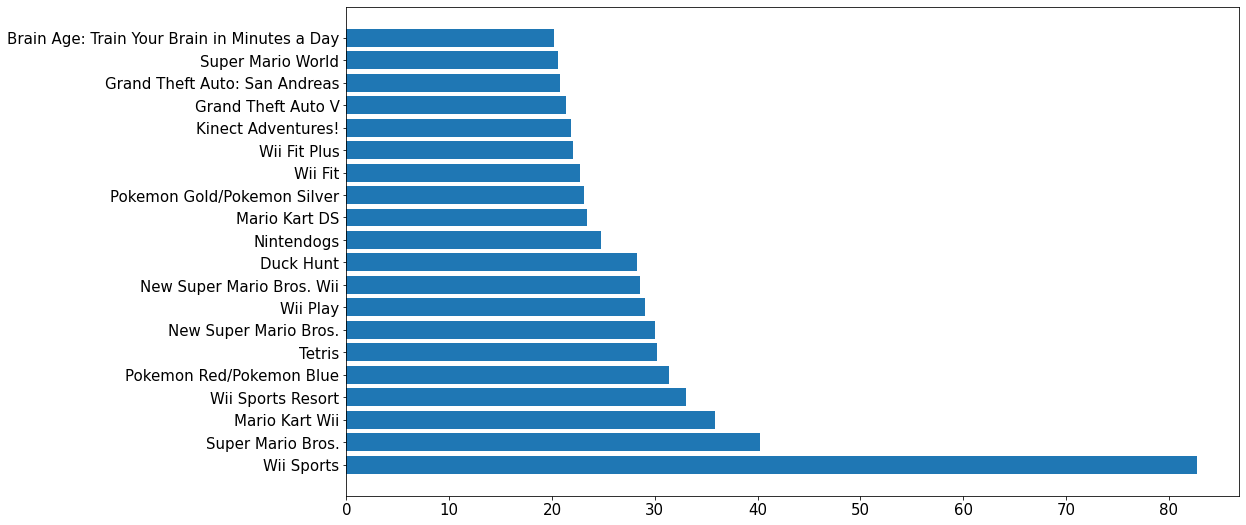

In [26]:
plt.figure(figsize = (16, 9))
plt.barh(df11.index, df11['Total_Sales'])
plt.yticks(df11.index, df11['Name'])

plt.show()

In [27]:
df12 = df11[['Genre', 'Total_Sales']].groupby('Genre').sum()
df12 = df12.sort_values(by = 'Total_Sales', ascending = False)
df12

,Total_Sales
Genre,
Sports,160.46
Platform,119.48
Misc,71.05
Racing,59.26
Role-Playing,54.47
Action,42.20
Puzzle,30.26
Shooter,28.31
Simulation,24.75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



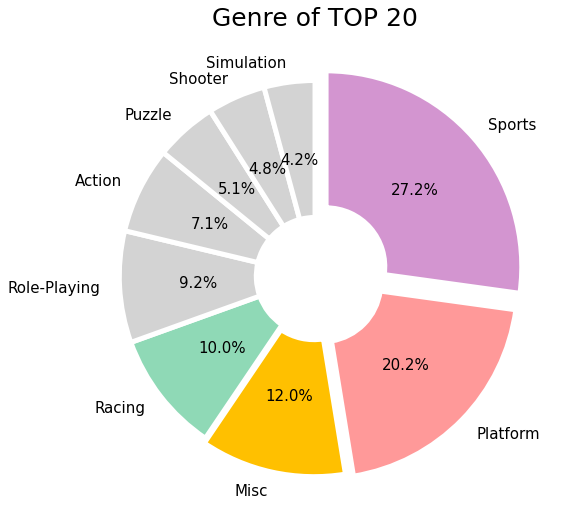

In [28]:
plt.figure(figsize = (16, 9))
plt.rc('font', size = 15)

explode = [0.075, 0.05, 0.025, 0, 0, 0, 0, 0, 0]
colors = ['#d395d0', '#ff9999', '#ffc000', '#8fd9b6', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df12, 
        labels = df12.index, 
        autopct ='%.1f%%', 
        startangle = 90, 
        counterclock = False,
        explode = explode,
        colors = colors,
        wedgeprops = wedgeprops)
plt.title('Genre of TOP 20', fontsize = 25)
plt.show();

In [29]:
df_GTA = df10['Name'].str.contains('Grand Theft Auto V')
dfGTA = df10[df_GTA]
dfgta = dfGTA.reset_index(drop = True)
dfgta

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
1,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003.0,Action,Take-Two Interactive,0.85,0.66,0.00,0.22,1.73
2,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
3,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,Take-Two Interactive,1.84,0.56,0.00,0.09,2.49
4,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
5,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
6,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


In [30]:
dfgta.groupby('Name').sum().sort_values(by = 'Total_Sales', ascending = False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,,
Grand Theft Auto V,10069.0,23.46,23.04,1.39,8.03,55.92
Rockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice City,4006.0,2.69,1.22,0.00,0.31,4.22


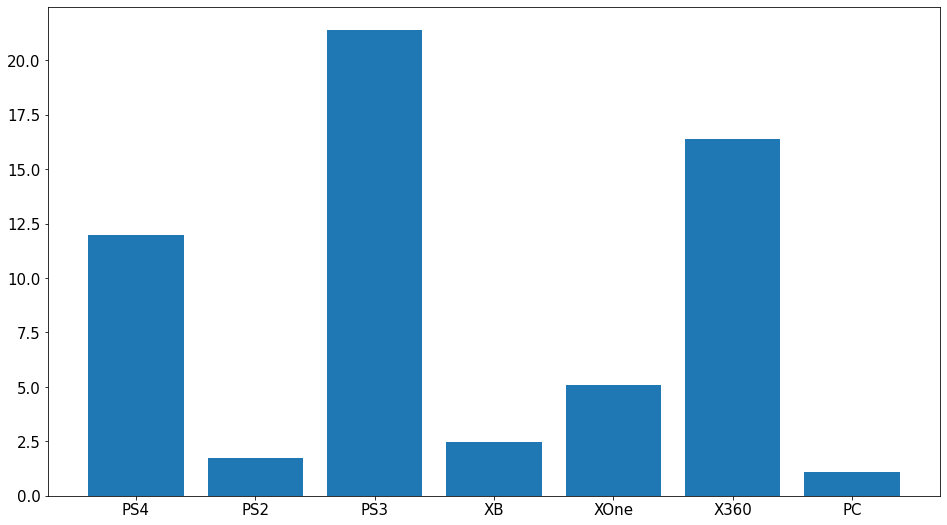

In [31]:
plt.figure(figsize = (16, 9))
plt.bar(dfgta.index, dfgta['Total_Sales'])
plt.xticks(dfgta.index, dfgta['Platform'])

plt.show()

In [32]:
dfPlatf = df10['Platform'].str.contains('PS3|X360|PS4|XOne|XB|PS2|PC')
dfplatf = df10[dfPlatf]
dfplatf

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
9,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08
13,Mount & Blade,PC,2008.0,Role-Playing,Paradox Interactive,0.00,0.02,0.00,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...
16588,Need for Speed Underground 2,XB,2004.0,NaN,Electronic Arts,1.38,0.80,0.00,0.10,2.28
16589,MindJack,PS3,2011.0,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.18
16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010.0,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05
16592,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53


In [33]:
dfplatf = dfplatf.groupby('Platform').sum()
dfp2 = dfplatf.drop(['PCFX'])
dfp2

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,,
PC,1882273.0,93.28,139.68,0.17,24.86,257.99
PS2,4239750.0,583.84,339.29,139.20,193.44,1255.77
PS3,2606109.0,392.26,343.71,79.99,141.93,957.89
PS4,671042.0,96.80,123.70,14.30,43.36,278.16
X360,2472205.0,601.05,280.58,12.43,85.54,979.60
XB,1598920.0,186.69,60.95,1.38,8.72,257.74
XOne,429150.0,83.19,45.65,0.34,11.92,141.10


In [34]:
df1['Platform'] = df['Platform']
dfp = df1.drop(['Genre'], axis = 1).sort_values(by = 'Year', ascending = False)
dfp.dtypes

NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Year           float64
Platform        object
dtype: object

In [35]:
dfp1 = dfp['Year'] > 2011
dfp11 = dfp[dfp1]
dfp11 = dfp11.groupby('Platform').sum()
dfp11['Total_Sales'] = dfp11['NA_Sales'] + dfp11['EU_Sales'] + dfp11['JP_Sales'] + dfp11['Other_Sales']
dfp11 = dfp11.sort_values(by = 'Total_Sales', ascending = False)

Text(0.5, 1.0, 'GTA 5')

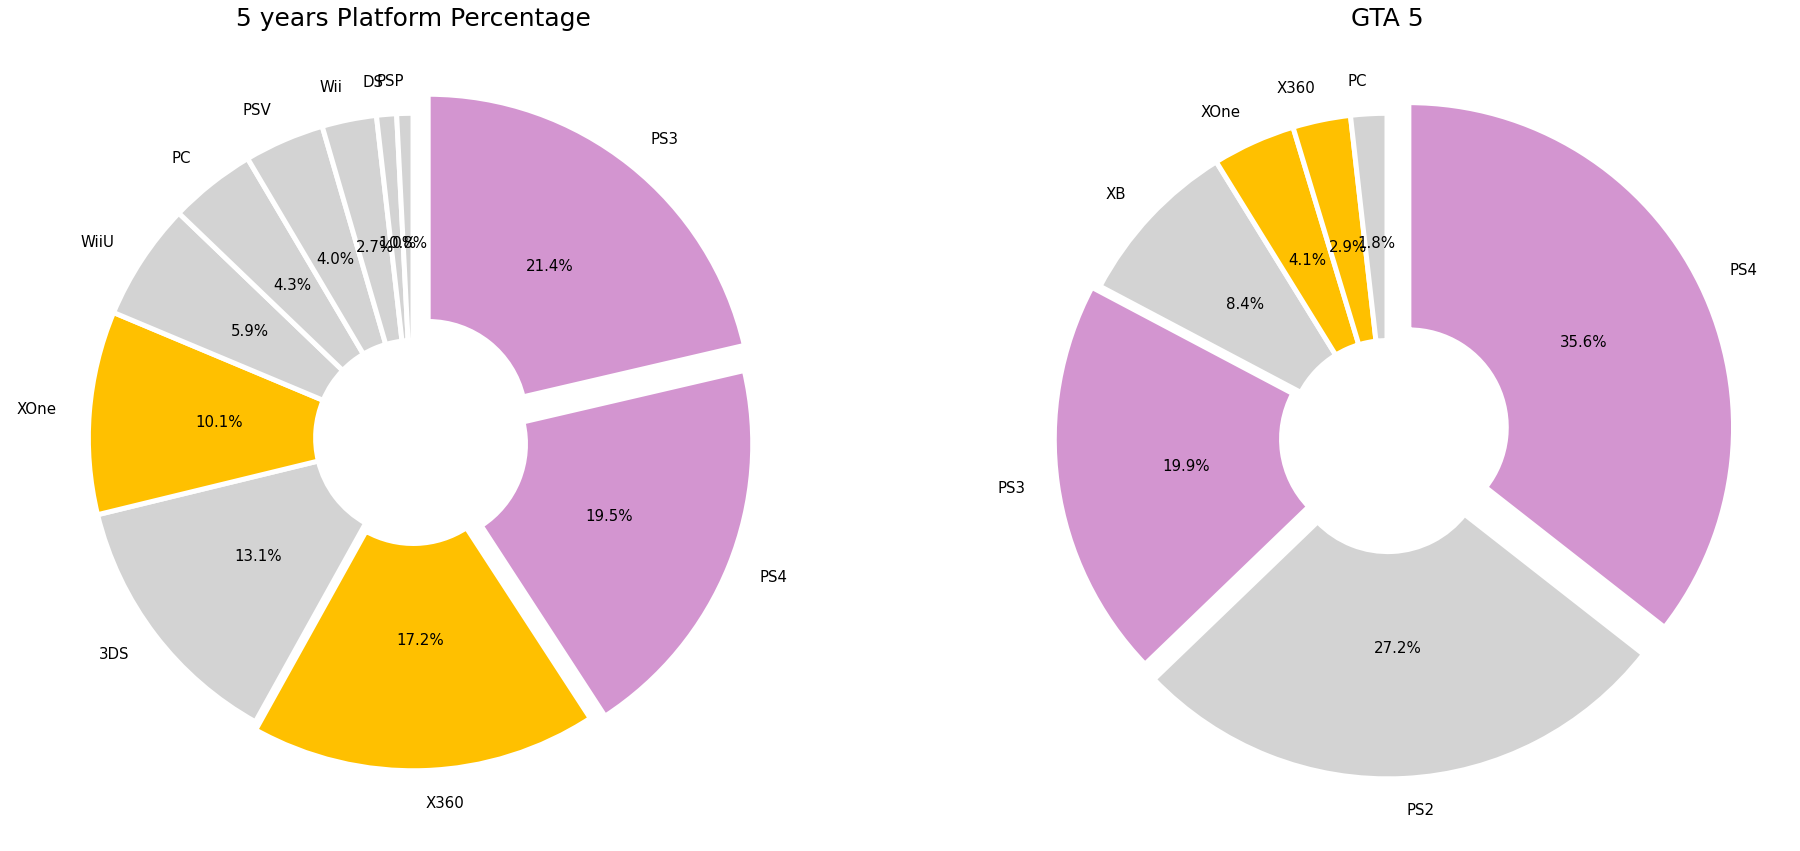

In [36]:
plt.figure(figsize = (32, 18))
plt.rc('font', size = 15)

explode = [0.075, 0.05, 0.025, 0, 0, 0, 0, 0, 0, 0, 0]
colors = ['#d395d0', '#d395d0', '#ffc000', 'lightgrey', '#ffc000', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
explode12 = [0.075, 0.05, 0.025, 0, 0, 0, 0]
colors12 = ['#d395d0', 'lightgrey', '#d395d0', 'lightgrey', '#ffc000', '#ffc000', 'lightgrey']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.subplot(1, 2, 1)
plt.pie(dfp11['Total_Sales'], 
        labels = dfp11.index, 
        autopct ='%.1f%%', 
        startangle = 90, 
        counterclock = False,
        explode = explode,
        colors = colors,
        wedgeprops = wedgeprops)
plt.title('5 years Platform Percentage', fontsize = 25)

plt.subplot(1, 2, 2)
plt.pie(dfgta['Total_Sales'].sort_values(ascending = False), 
        labels = dfgta['Platform'], 
        autopct ='%.1f%%', 
        startangle = 90, 
        counterclock = False,
        explode = explode12,
        colors = colors12,
        wedgeprops = wedgeprops)
plt.title('GTA 5', fontsize = 25)

In [37]:
t1 = dfgta.drop(['Name', 'Year', 'Genre', 'Publisher', 'Total_Sales'], axis = 1).groupby('Platform').sum().T
t1

Platform,PC,PS2,PS3,PS4,X360,XB,XOne
NA_Sales,0.36,0.85,7.01,3.80,9.63,1.84,2.66
EU_Sales,0.64,0.66,9.27,5.81,5.31,0.56,2.01
JP_Sales,0.00,0.00,0.97,0.36,0.06,0.00,0.00
Other_Sales,0.08,0.22,4.14,2.02,1.38,0.09,0.41


In [38]:
t2 = dfp11.reset_index().drop(['Year', 'Total_Sales'], axis = 1).groupby('Platform').sum().T
t2

Platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
NA_Sales,51.05,5.22,18.23,102.39,94.04,0.13,14.14,18.68,38.32,139.01,83.19
EU_Sales,39.88,4.11,35.19,113.99,121.05,0.45,14.21,12.93,24.23,79.98,45.65
JP_Sales,84.15,3.72,0.00,34.65,14.11,10.45,19.83,3.39,12.79,1.57,0.34
Other_Sales,8.17,0.82,6.84,47.07,42.33,0.21,7.55,2.85,6.45,20.10,11.92


In [39]:
from scipy.stats import chi2_contingency

print(chi2_contingency(t2, correction = True))

(402.03677053661903, 1.0836691812648902e-66, 30, array([[ 74.12052631,   5.61010477,  24.37382218, 120.5747825 ,
        109.82781178,   4.5463286 ,  22.54153851,  15.30947842,
         33.08222563,  97.34158724,  57.07179406],
       [ 64.56916933,   4.8871726 ,  21.23295031, 105.03721352,
         95.67512441,   3.96047729,  19.6367793 ,  13.33666062,
         28.81916704,  84.79790609,  49.7173795 ],
       [ 24.29535324,   1.83888976,   7.98929324,  39.522209  ,
         35.99954851,   1.49020339,   7.38870415,   5.01816709,
         10.84374866,  31.90679241,  18.70709054],
       [ 20.26495112,   1.53383286,   6.66393427,  32.96579498,
         30.0275153 ,   1.24299073,   6.16297804,   4.18569386,
          9.04485868,  26.61371426,  15.6037359 ]]))
